# Constructing the minimum polynomial for $F(x)= (1 + x)^{-1/2}$ for $0 \leq x \leq 5/4$


by minimzing
$$
    J = J(c_0, \ldots, c_{n-1}) = \int_{0}^{5/4} \left[ \frac{1}{\sqrt{1+x}} - \sum_{k=0}^{n-1} c_k x^ k \right]^2 dx
$$

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [65]:
n = 10
c = sp.symbols(f"c_0:{n}")
x = sp.symbols('x')

min_poly = sum(coeff * x ** k for k, coeff in enumerate(c))

J = sp.integrate((1 / sp.sqrt(1 + x) - min_poly)**2, (x,-sp.Rational(1,4), sp.Rational(5,4))).simplify() 

optimal_solution = sp.solve([
    sp.Eq(J.diff(coeff), 0) for coeff in c
])

min_poly = sp.lambdify(x, min_poly.subs(optimal_solution), 'numpy')

J.subs(optimal_solution).evalf()

1.98794298593528e-13

compare the minimal polynomial and exact result 

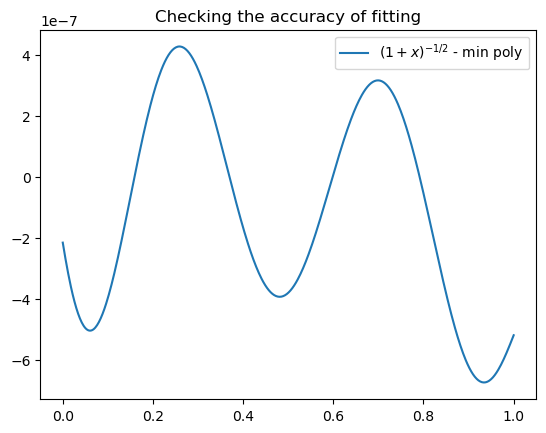

In [66]:
xi = np.linspace(-0, 1, 500) 


plt.title("Checking the accuracy of fitting")
plt.plot(xi, 1 / np.sqrt(1 + xi) - min_poly(xi), label="$(1 + x)^{-1/2}$ - min poly")
#plt.plot(xi, 1 / np.sqrt(1 + xi))
#plt.plot(xi, min_poly(xi))
plt.legend()
plt.show()

Generating the code for the list of coefficients

In [67]:
[sp.simplify(optimal_solution[_]) for _ in c]

[79024212707/1259712 - 136871769551*sqrt(3)/3779136,
 -31168418161/34992 + 53985253543*sqrt(3)/104976,
 -15123739693/2187 + 26195086969*sqrt(3)/6561,
 378146179940/6561 - 654968399900*sqrt(3)/19683,
 5811961960/2187 - 10066612360*sqrt(3)/6561,
 -1564588177376/2187 + 2709946215200*sqrt(3)/6561,
 12877495119104/6561 - 22304475818240*sqrt(3)/19683,
 -5052785959936/2187 + 8751682001920*sqrt(3)/6561,
 2822664965120/2187 - 4888999132160*sqrt(3)/6561,
 -5514942484480/19683 + 9552160583680*sqrt(3)/59049]

In [45]:
-978121 + 564719*sqrt(3)

NameError: name 'sqrt' is not defined